In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Train

In [2]:
base_dir = 'datasets/dogs_vs_cats/'
train_dir = os.path.join(base_dir, 'train')

In [3]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

In [4]:
generator = ImageDataGenerator(rescale=1.0/255., validation_split=0.3)

In [5]:
train_generator = generator.flow_from_directory(train_dir,
                                                batch_size=20,
                                                class_mode='binary',
                                                target_size=(150, 150),
                                                subset='training'
                                               )

val_generator = generator.flow_from_directory(train_dir,
                                                batch_size=20,
                                                class_mode='binary',
                                                target_size=(150, 150),
                                                subset='validation'
                                               )

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [7]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

In [8]:
print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.2587.jpg', 'cat.5777.jpg', 'cat.5479.jpg', 'cat.2561.jpg', 'cat.6315.jpg', 'cat.12084.jpg', 'cat.3573.jpg', 'cat.6867.jpg', 'cat.4188.jpg', 'cat.1035.jpg']
['dog.8939.jpg', 'dog.4870.jpg', 'dog.6630.jpg', 'dog.6063.jpg', 'dog.12330.jpg', 'dog.5347.jpg', 'dog.3869.jpg', 'dog.11833.jpg', 'dog.3787.jpg', 'dog.9037.jpg']


In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [22]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [25]:
model.compile(
    optimizer=RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [26]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=875,
                    epochs=15,
                    validation_steps=375,
                    verbose=2
                    )

Epoch 1/15
875/875 - 98s - loss: 0.6018 - accuracy: 0.6797 - val_loss: 0.5319 - val_accuracy: 0.7275
Epoch 2/15
875/875 - 97s - loss: 0.4780 - accuracy: 0.7722 - val_loss: 0.5103 - val_accuracy: 0.7580
Epoch 3/15
875/875 - 97s - loss: 0.4155 - accuracy: 0.8155 - val_loss: 0.4260 - val_accuracy: 0.8052
Epoch 4/15
875/875 - 99s - loss: 0.3712 - accuracy: 0.8395 - val_loss: 0.4156 - val_accuracy: 0.8161
Epoch 5/15
875/875 - 97s - loss: 0.3310 - accuracy: 0.8614 - val_loss: 0.4085 - val_accuracy: 0.8249
Epoch 6/15
875/875 - 98s - loss: 0.3016 - accuracy: 0.8767 - val_loss: 0.3908 - val_accuracy: 0.8275
Epoch 7/15
875/875 - 99s - loss: 0.2760 - accuracy: 0.8903 - val_loss: 0.5340 - val_accuracy: 0.7623
Epoch 8/15
875/875 - 97s - loss: 0.2537 - accuracy: 0.9014 - val_loss: 0.4632 - val_accuracy: 0.8296
Epoch 9/15
875/875 - 96s - loss: 0.2387 - accuracy: 0.9107 - val_loss: 0.5521 - val_accuracy: 0.8280
Epoch 10/15
875/875 - 96s - loss: 0.2333 - accuracy: 0.9137 - val_loss: 0.5349 - val_accura

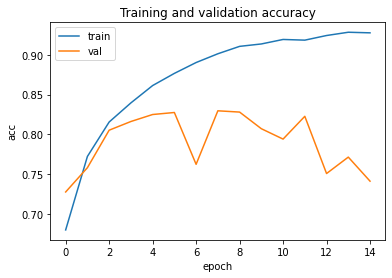

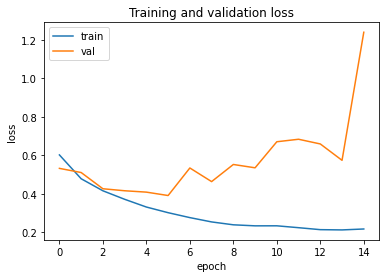

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['train','val'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train','val'])
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()